# Group Fake News Project

## Part 1: Data Processing


### Task 1.1

In [166]:
import pandas as pd

# 1. Read the CSV file
data = pd.read_csv('news_sample.csv')

In [167]:
import re
from cleantext import clean

def preprocess_text(text):
    cleaned_text = clean(text,
                         fix_unicode=True,
                         to_ascii=True,
                         lower=True,
                         no_line_breaks=True,
                         no_urls=True,
                         no_emails=True,
                         no_phone_numbers=True,
                         no_numbers=True,
                         no_digits=True,
                         no_currency_symbols=True,
                         no_punct=False,  
                         replace_with_url="<URL>",
                         replace_with_email="<EMAIL>",
                         replace_with_phone_number="<PHONE>",
                         replace_with_number="<NUM>",
                         replace_with_digit="<NUM>",
                         replace_with_currency_symbol="<CUR>",
                         lang="en")
    return cleaned_text

In [168]:
import pandas as pd
import re

# Tokenize text into words
def tokenize(text):
    words = re.findall(r'\b\w+\b', text)
    return words

# Preprocessing to the text column
data['cleaned_text'] = data['content'].apply(preprocess_text)

# Cleaned text into one string
cleaned_text = ' '.join(data['cleaned_text'])


In [169]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist

# Tokenize the text
tokens = word_tokenize(cleaned_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Compute vocabulary size before removing stopwords
vocab_before = set(tokens)
vocab_size_before = len(vocab_before)

# Compute vocabulary size after removing stopwords
vocab_after = set(filtered_tokens)
vocab_size_after = len(vocab_after)

# Compute reduction rate of vocabulary size after removing stopwords
reduction_rate_stopwords = (vocab_size_before - vocab_size_after) / vocab_size_before

# Stemming
porter = PorterStemmer()
stemmed_tokens = [porter.stem(word) for word in filtered_tokens]

# Compute vocabulary size before stemming
vocab_size_before_stemming = len(vocab_after)

# Compute vocabulary size after stemming
vocab_after_stemming = set(stemmed_tokens)
vocab_size_after_stemming = len(vocab_after_stemming)

# Compute reduction rate of vocabulary size after stemming
reduction_rate_stemming = (vocab_size_before_stemming - vocab_size_after_stemming) / vocab_size_before_stemming

# Display results
print("Size of vocabulary before removing stopwords:", vocab_size_before)
print("Size of vocabulary after removing stopwords:", vocab_size_after)
print("Reduction rate of vocabulary size after removing stopwords: {:.2f}%".format(reduction_rate_stopwords * 100))

print("\nSize of vocabulary before stemming:", vocab_size_before_stemming)
print("Size of vocabulary after stemming:", vocab_size_after_stemming)
print("Reduction rate of vocabulary size after stemming: {:.2f}%".format(reduction_rate_stemming * 100))

Size of vocabulary before removing stopwords: 16475
Size of vocabulary after removing stopwords: 16343
Reduction rate of vocabulary size after removing stopwords: 0.80%

Size of vocabulary before stemming: 16343
Size of vocabulary after stemming: 11168
Reduction rate of vocabulary size after stemming: 31.66%


### Task 1.2.

Columns: Index(['Unnamed: 0', 'id', 'domain', 'type', 'url', 'content', 'scraped_at',
       'inserted_at', 'updated_at', 'title', 'authors', 'keywords',
       'meta_keywords', 'meta_description', 'tags', 'summary'],
      dtype='object')
Number of Rows: 250
Data Types:
 Unnamed: 0            int64
id                    int64
domain               object
type                 object
url                  object
content              object
scraped_at           object
inserted_at          object
updated_at           object
title                object
authors              object
keywords            float64
meta_keywords        object
meta_description     object
tags                 object
summary             float64
dtype: object

Distribution of News Types:
type
fake          155
conspiracy     31
political      23
               12
unreliable      6
bias            6
junksci         6
unknown         6
reliable        3
clickbait       1
hate            1
Name: count, dtype: int64

Top 10

/var/folders/p_/9bns98pj4h5c2dt98k6srvnw0000gn/T/ipykernel_10694/3200154373.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna('', inplace=True)


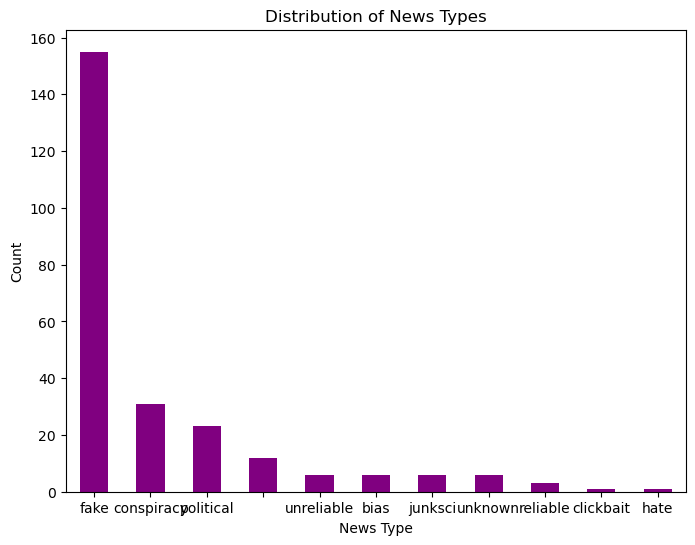

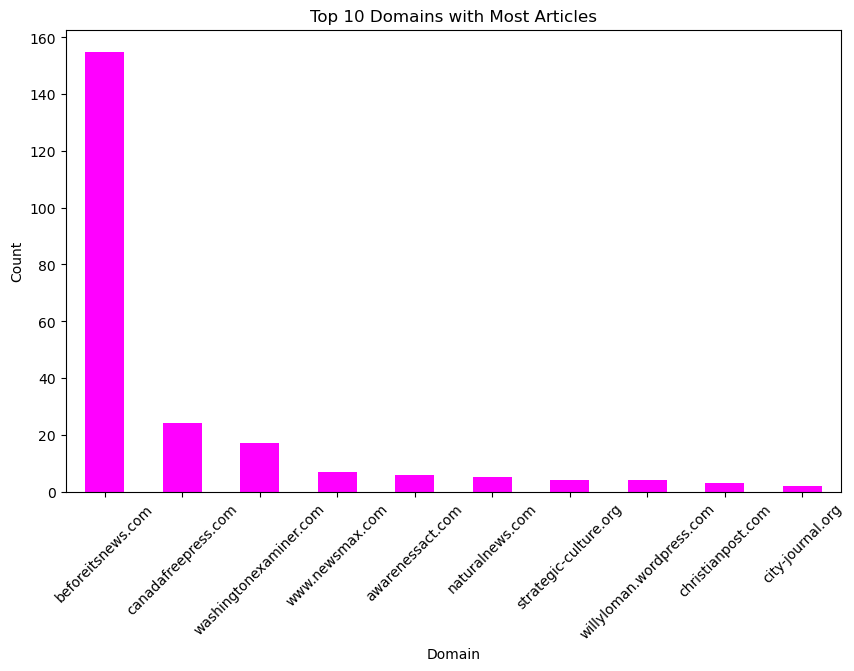

In [170]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a Pandas DataFrame
data = pd.read_csv('news_sample.csv')

# Initial Data Exploration
print("Columns:", data.columns)
print("Number of Rows:", len(data))
print("Data Types:\n", data.dtypes)

# Handle missing values
data.fillna('', inplace=True)

# Explore the distribution of fake news vs. real news articles
news_type_distribution = data['type'].value_counts()
print("\nDistribution of News Types:")
print(news_type_distribution)

# Explore the distribution of articles across different domains
domain_distribution = data['domain'].value_counts().head(10)
print("\nTop 10 Domains with Most Articles:")
print(domain_distribution)

# Explore the most common keywords associated with fake news articles
fake_news_keywords = data[data['type'] == 'fake']['keywords'].str.split(',').explode().value_counts().head(10)
print("\nTop 10 Keywords in Fake News Articles:")
print(fake_news_keywords)

# Explore the most common meta keywords associated with fake news articles
fake_news_meta_keywords = data[data['type'] == 'fake']['meta_keywords'].str.split(',').explode().value_counts().head(10)
print("\nTop 10 Meta Keywords in Fake News Articles:")
print(fake_news_meta_keywords)

# Visualize the distribution of news types
plt.figure(figsize=(8, 6))
news_type_distribution.plot(kind='bar', color='purple')
plt.title('Distribution of News Types')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Visualize the distribution of articles across different domains
plt.figure(figsize=(10, 6))
domain_distribution.plot(kind='bar', color='magenta')
plt.title('Top 10 Domains with Most Articles')
plt.xlabel('Domain')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Task 1.3.

In [171]:
# Apply your data preprocessing pipeline to the 995,000 rows sampled from the FakeNewsCorpus.

### Task 1.4.

##### Split the resulting dataset into a training, validation, and test splits. A common strategy is to uniformly at random split the data 80% / 10% / 10%. You will use the training data to train your baseline and advanced models, the validation data can be used for model selection and hyperparameter tuning, while the test data should only be used in Part 4.